### JAX Tutorial - Part 1 

In [10]:
import numpy as np
import jax.numpy as jnp
#Transform functions
from jax import grad, jit, vmap, pmap
# JAX low level API
# lax is an anagram for XLA, not sure how people come up JAX
from jax import lax

from jax import make_jaxpr
from jax import random

from jax import device_put

import matplotlib.pyplot as plt


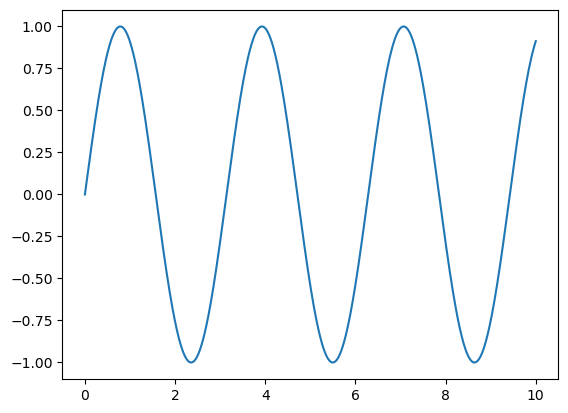

In [8]:
x_np = np.linspace(0,10,1000)
y_np = 2*np.sin(x_np)*np.cos(x_np)
plt.plot(x_np,y_np)

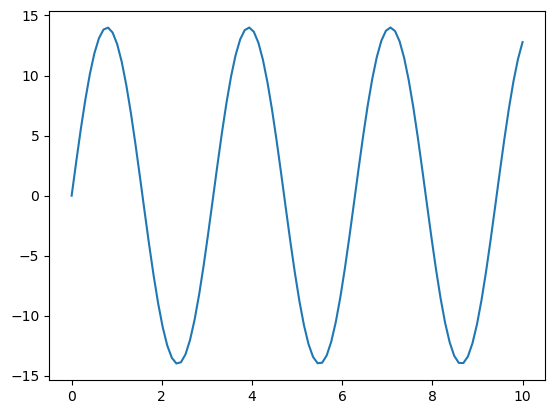

In [ ]:
x_jnp = jnp.linspace(0,10,100)
y_jnp = 28*jnp.sin(x_jnp)*jnp.cos(x_jnp)

plt.plot(x_jnp,y_jnp)

In [29]:
# NumPy is mutable:
size = 10
index = 0
value = 23

x = np.arange(size)
print(x)
x[index] = value
print(x)


[0 1 2 3 4 5 6 7 8 9]
[23  1  2  3  4  5  6  7  8  9]


In [31]:
# JAX is not mutable:
x = jnp.arange(size)
print(x)
# x[index] = value 
y = x.at[index].set(value)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[23  1  2  3  4  5  6  7  8  9]


In [36]:
#JAX handles random numbers differently for a good reason.
seed = 0
key = random.PRNGKey(seed)

x = random.normal(key,(10,))
print(type(x),x)

<class 'jaxlib.xla_extension.ArrayImpl'> [ 1.6226422   2.0252647  -0.43359444 -0.07861735  0.1760909  -0.97208923
 -0.49529874  0.4943786   0.6643493  -0.9501635 ]


In [39]:
# JAX is accelerator agnostic
size = 3000

x_jnp  = random.normal(key,(size,size),dtype = jnp.float32)
x_np = np.random.normal(size=(size,size)).astype(np.float32)

In [ ]:
%timeit jnp.dot(x_jnp,x_jnp.T).block_until_ready()

%timeit np.dot(x_np,x_np.T)

%timeit jnp.dot(x_np,x_np.T).block_until_ready()

x_np_device = device_put(x_np)
%timeit jnp.dot(x_np_device,x_np_device.T).block_until_ready()

#block_until_read : asynchronous dispatch ->

77.1 ms ± 3.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
26.9 ms ± 125 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
77.2 ms ± 2.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
73.1 ms ± 614 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Transform functions:
jit()

In [49]:
def visualise_fn(fn,l=-10,r=10,n=1000):
    x = np.linspace(l,r,num=n)
    y = fn(x)
    plt.plot(x,y); plt.show()

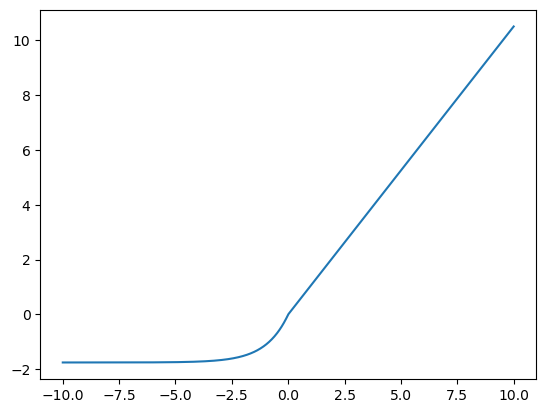

In [55]:
#define an activation function
def selu(x,alpha = 1.67,lmbda=1.05):
    return lmbda*jnp.where(x>0,x,alpha*jnp.exp(x) - alpha) 

selu_jit = jit(selu)

visualise_fn(selu)

In [ ]:
data = random.normal(key,(1000000,))

print('non jit')
%timeit selu(data).block_until_ready()
print('jit')
%timeit selu_jit(data).block_until_ready()